In [5]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

counts= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/SSConditions_DataFrame.csv')

#Possar com a index la columna entre parentesi:
counts= counts.set_index('ensembl')

counts= counts[counts.sum(axis=1) > 0]

counts=counts.T

counts.columns = [col.split('.')[0] for col in counts.columns]
counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
IGT_counts,438,0,518,249,43,2,283,426,324,252,...,1,0,0,18,1,2,0,1,0,5
IGT_counts.1,118,0,570,308,32,2,186,426,471,236,...,0,0,0,14,0,0,0,0,0,0
IGT_counts.2,567,1,892,285,43,63,1287,1011,446,237,...,1,0,0,5,0,0,0,4,0,6
IGT_counts.3,342,7,558,351,56,0,130,516,369,250,...,23,0,0,2,0,0,0,12,0,4
IGT_counts.4,183,2,606,207,56,0,57,525,396,251,...,7,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3cD_counts.30,717,0,868,385,111,26,2456,856,455,345,...,0,0,0,22,0,0,0,5,0,2
T3cD_counts.31,285,4,1066,298,37,44,571,807,393,278,...,8,0,0,135,0,0,0,8,0,0
T3cD_counts.32,619,7,940,304,24,25,1080,802,366,172,...,0,0,0,71,0,6,0,4,0,3
T3cD_counts.33,422,0,1165,366,59,205,1011,1082,475,332,...,1,0,0,2,0,0,0,1,0,2


In [7]:
conditions = ['IGT'] * 41 + ['ND'] * 18 + ['T2D'] * 39 + ['T3cD'] * 35

# Crear un nuevo DataFrame basado en el DataFrame original
metadata = pd.DataFrame(zip(counts.index, conditions), columns=['Sample', 'condition'])
metadata=metadata.set_index('Sample')
metadata

,condition
Sample,
IGT_counts,IGT
IGT_counts.1,IGT
IGT_counts.2,IGT
IGT_counts.3,IGT
IGT_counts.4,IGT
...,...
T3cD_counts.30,T3cD
T3cD_counts.31,T3cD
T3cD_counts.32,T3cD


In [8]:
dds = DeseqDataSet(counts=counts,metadata=metadata,design_factors="condition")
dds

AnnData object with n_obs × n_vars = 133 × 51914
    obs: 'condition'
    obsm: 'design_matrix'

In [9]:
dds.deseq2()

Fitting size factors...
... done in 0.41 seconds.

Fitting dispersions...
... done in 11.88 seconds.

Fitting dispersion trend curve...
... done in 1.27 seconds.

Fitting MAP dispersions...
... done in 13.01 seconds.

Fitting LFCs...
... done in 8.51 seconds.

Replacing 962 outlier genes.

Fitting dispersions...
... done in 0.34 seconds.

Fitting MAP dispersions...
... done in 0.34 seconds.

Fitting LFCs...
... done in 0.29 seconds.



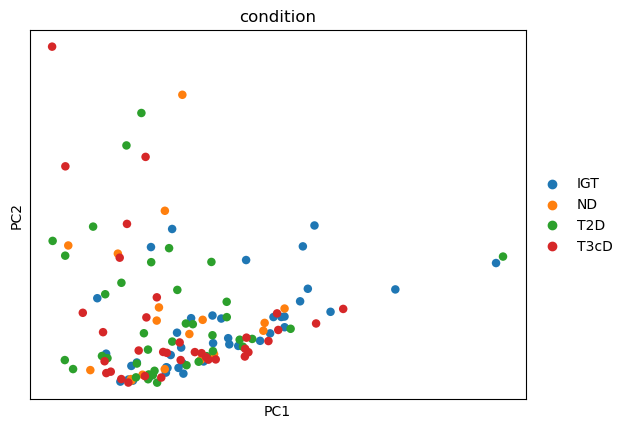

In [26]:
import scanpy as sc

sc.tl.pca(dds)
sc.pl.pca(dds, color='condition',size=150)

In [16]:
condition_counts = counts.copy()
condition_counts.index = conditions
condition_counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
IGT,438,0,518,249,43,2,283,426,324,252,...,1,0,0,18,1,2,0,1,0,5
IGT,118,0,570,308,32,2,186,426,471,236,...,0,0,0,14,0,0,0,0,0,0
IGT,567,1,892,285,43,63,1287,1011,446,237,...,1,0,0,5,0,0,0,4,0,6
IGT,342,7,558,351,56,0,130,516,369,250,...,23,0,0,2,0,0,0,12,0,4
IGT,183,2,606,207,56,0,57,525,396,251,...,7,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3cD,717,0,868,385,111,26,2456,856,455,345,...,0,0,0,22,0,0,0,5,0,2
T3cD,285,4,1066,298,37,44,571,807,393,278,...,8,0,0,135,0,0,0,8,0,0
T3cD,619,7,940,304,24,25,1080,802,366,172,...,0,0,0,71,0,6,0,4,0,3
T3cD,422,0,1165,366,59,205,1011,1082,475,332,...,1,0,0,2,0,0,0,1,0,2


In [22]:
x = condition_counts.iloc[:, 0:51914].values  
y= condition_counts.index.values

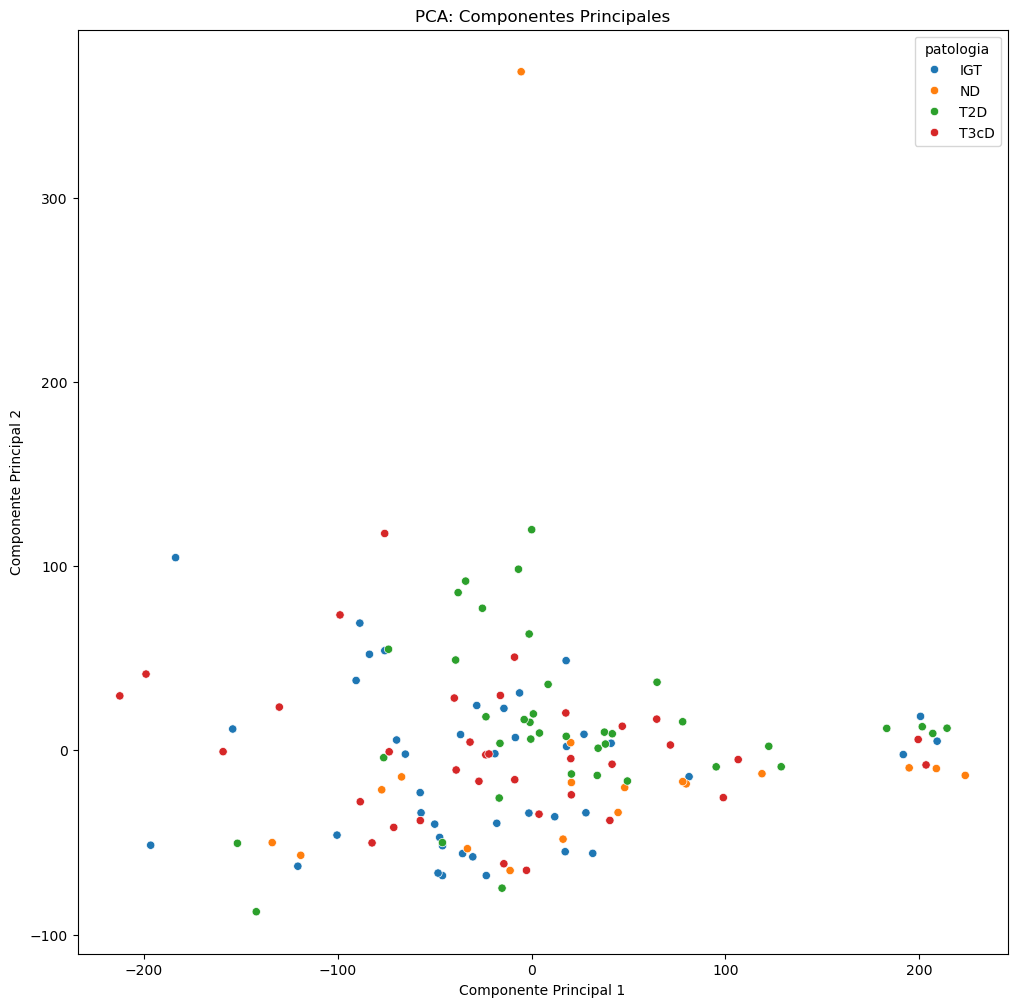

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 12))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")



plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()